In [1]:
# 
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


In [2]:
# load data
mat = np.loadtxt('wdbc.data.csv',dtype=str,delimiter=',')
features = np.asarray(mat[:,2:],dtype=float)

In [3]:
# 'M' for malignant, 'B' for benign
print(np.where(mat[:,1]=='M')[0].shape)
print(np.where(mat[:,1]=='B')[0].shape)

(212,)
(357,)


In [ ]:
'''
data description from column 2 to 11
a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)
'''

In [4]:
# create Panda date frame
data = {
        'radius_mean':features[:,0],'texture_mean':features[:,1],'perimeter_mean':features[:,2],
        'area_mean':features[:,3],'smoothness_mean':features[:,4],'compactness_mean':features[:,5],
        'concavity_mean':features[:,6],'concave_point_mean':features[:,7],'symmetry_mean':features[:,8],
        'fractal_dimension_mean':features[:,9],
        'radius_std':features[:,10],'texture_std':features[:,11],'perimeter_std':features[:,12],
        'area_std':features[:,13],'smoothness_std':features[:,14],'compactness_std':features[:,15],
        'concavity_std':features[:,16],'concave_point_std':features[:,17],'symmetry_std':features[:,18],
        'fractal_dimension_std':features[:,19],
        'radius_worst':features[:,20],'texture_worst':features[:,21],'perimeter_worst':features[:,22],
        'area_worst':features[:,23],'smoothness_worst':features[:,24],'compactness_worst':features[:,25],
        'concavity_worst':features[:,26],'concave_point_worst':features[:,27],'symmetry_worst':features[:,28],
        'fractal_dimension_worst':features[:,29],
       }
df = pd.DataFrame(data)

label = mat[:,1]

In [5]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_point_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


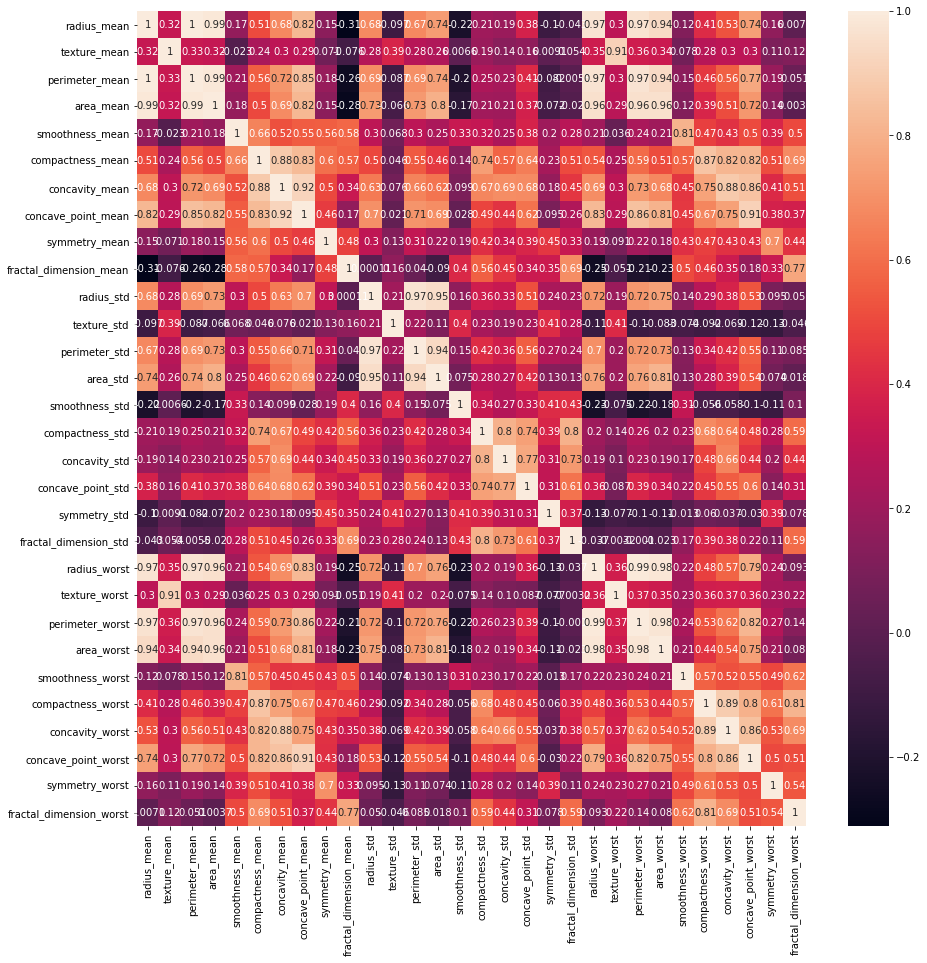

In [6]:
plt.figure(figsize=(15,15))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

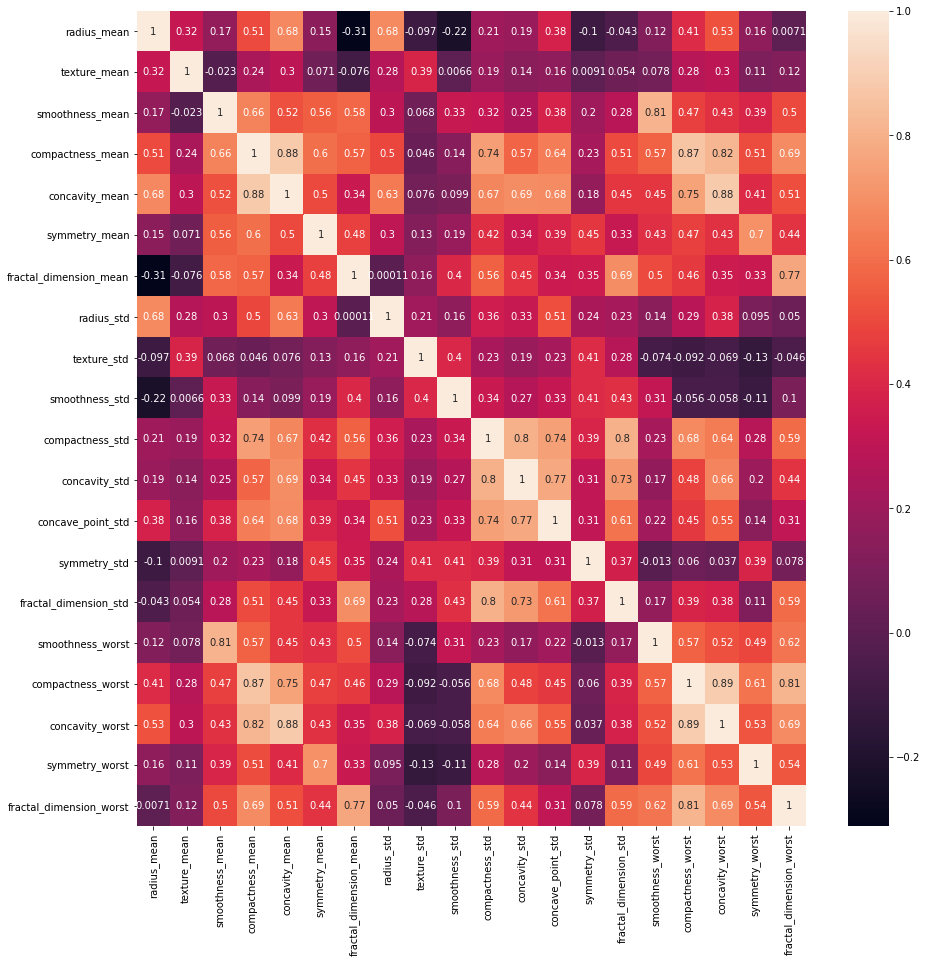

In [22]:
# remove redundant variables whose correlation > 0.9
drop_list = ['perimeter_mean','area_mean','perimeter_std','area_std','radius_worst','perimeter_worst','area_worst',
            'texture_worst','concave_point_worst','concave_point_mean']
df_1 = df.drop(drop_list,axis = 1 )    
df_1.head()

plt.figure(figsize=(15,15))
corrMatrix = df_1.corr()
sn.heatmap(corrMatrix, annot=True)
plt.savefig('Corr.png',dpi=300)

Accuracy is:  0.9444444444444444


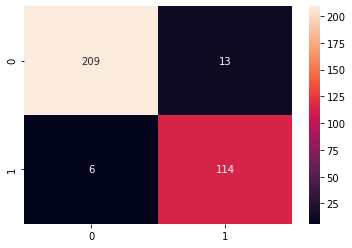

In [10]:
# divide dataset into test and train
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(df_1, label, test_size=0.6, random_state=60)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sn.heatmap(cm,annot=True,fmt="d")
plt.savefig('rf.png',dpi=300)

Accuracy is:  0.9035087719298246


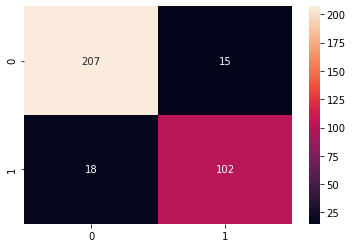

In [11]:
# SVM
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(x_train,y_train)
ac = accuracy_score(y_test,svm_model.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,svm_model.predict(x_test))
sn.heatmap(cm,annot=True,fmt="d")
plt.savefig('svm.png',dpi=300)

In [52]:
# use the model for prognostic data
mat_prog = np.loadtxt('wpbc.data.csv',dtype=str,delimiter=',')
features_prog = np.asarray(mat_prog[:,3:33],dtype=float)

In [53]:
# 'N' for Nonrecur, 'R' for Recur
print(np.where(mat_prog[:,1]=='N')[0].shape)
print(np.where(mat_prog[:,1]=='R')[0].shape)

(151,)
(47,)


In [165]:
# Classifiy into positive(benign)/negative(malignant) based on 2-year threshold
time_label = np.asarray(mat_prog[:,2],dtype=float)
B_ind = np.where((mat_prog[:,1]=='N') & (time_label>=12))[0]
M_ind = np.where((mat_prog[:,1]=='R') & (time_label<=12))[0]
all_ind = np.concatenate([B_ind,M_ind])
#features_prog_new = features_prog[np.concatenate([B_ind,M_ind]),:]
#features_prog_new = features_prog
labels_prog = mat_prog[all_ind,1]
labels_prog[labels_prog=='R'] = 'M'
labels_prog[labels_prog=='N'] = 'B'

In [139]:
labels_prog

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M'], dtype='<U8')

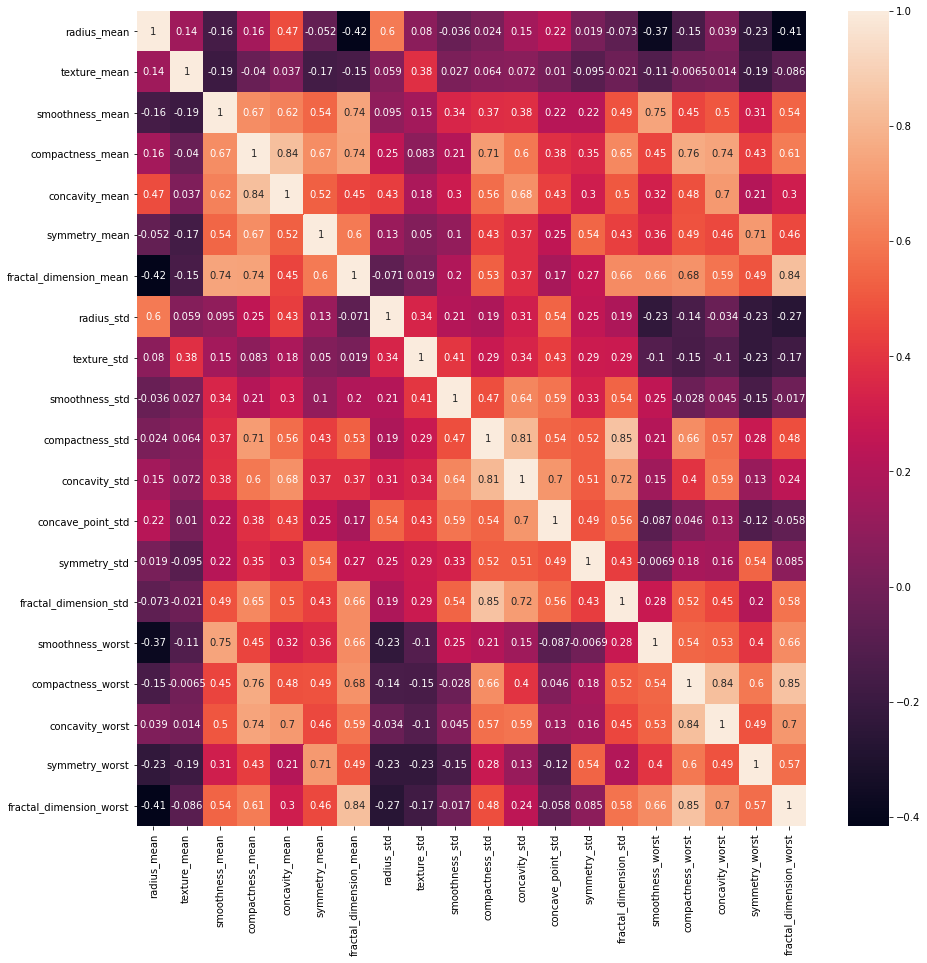

In [12]:
# create Panda date frame
data_prog = {
        'radius_mean':features_prog[:,0],'texture_mean':features_prog[:,1],'perimeter_mean':features_prog[:,2],
        'area_mean':features_prog[:,3],'smoothness_mean':features_prog[:,4],'compactness_mean':features_prog[:,5],
        'concavity_mean':features_prog[:,6],'concave_point_mean':features_prog[:,7],'symmetry_mean':features_prog[:,8],
        'fractal_dimension_mean':features_prog[:,9],
        'radius_std':features_prog[:,10],'texture_std':features_prog[:,11],'perimeter_std':features_prog[:,12],
        'area_std':features_prog[:,13],'smoothness_std':features_prog[:,14],'compactness_std':features_prog[:,15],
        'concavity_std':features_prog[:,16],'concave_point_std':features_prog[:,17],'symmetry_std':features_prog[:,18],
        'fractal_dimension_std':features_prog[:,19],
        'radius_worst':features_prog[:,20],'texture_worst':features_prog[:,21],'perimeter_worst':features_prog[:,22],
        'area_worst':features_prog[:,23],'smoothness_worst':features_prog[:,24],'compactness_worst':features_prog[:,25],
        'concavity_worst':features_prog[:,26],'concave_point_worst':features_prog[:,27],'symmetry_worst':features_prog[:,28],
        'fractal_dimension_worst':features_prog[:,29],
       }
df_prog = pd.DataFrame(data_prog)

df_prog_1 = df_prog.drop(drop_list,axis = 1 )   
df_prog_1.head()

plt.figure(figsize=(15,15))
corrMatrix = df_prog_1.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Accuracy is:  0.31875


<AxesSubplot:>

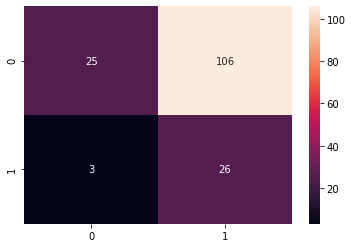

In [59]:
ac = accuracy_score(labels_prog,svm_model.predict(df_prog_1.iloc[all_ind]))
print('Accuracy is: ',ac)
cm = confusion_matrix(labels_prog,svm_model.predict(df_prog_1.iloc[all_ind]))
sn.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.225


<AxesSubplot:>

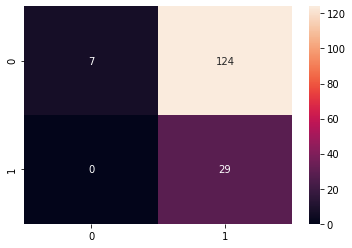

In [60]:
ac = accuracy_score(labels_prog,clf_rf.predict(df_prog_1.iloc[all_ind]))
print('Accuracy is: ',ac)
cm = confusion_matrix(labels_prog,clf_rf.predict(df_prog_1.iloc[all_ind]))
sn.heatmap(cm,annot=True,fmt="d")

(array([0]), [Text(0, 0, 'area_mean')])

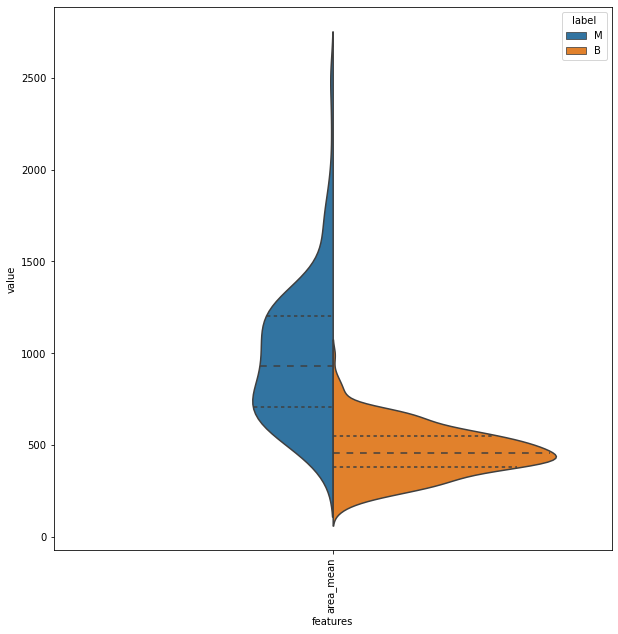

In [141]:
# Examine data 
# first ten features
data_dia = pd.DataFrame({'label':label})
data = df
# data_n_2 = (data - data.mean()) / (data.std())              # standardization
data_n_2 = data
data = pd.concat([data_dia,data_n_2.iloc[:,3]],axis=1)
data = pd.melt(data,id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sn.violinplot(x="features", y="value", hue="label", data=data,split=True, inner="quart")
plt.xticks(rotation=90)


(array([0]), [Text(0, 0, 'area_mean')])

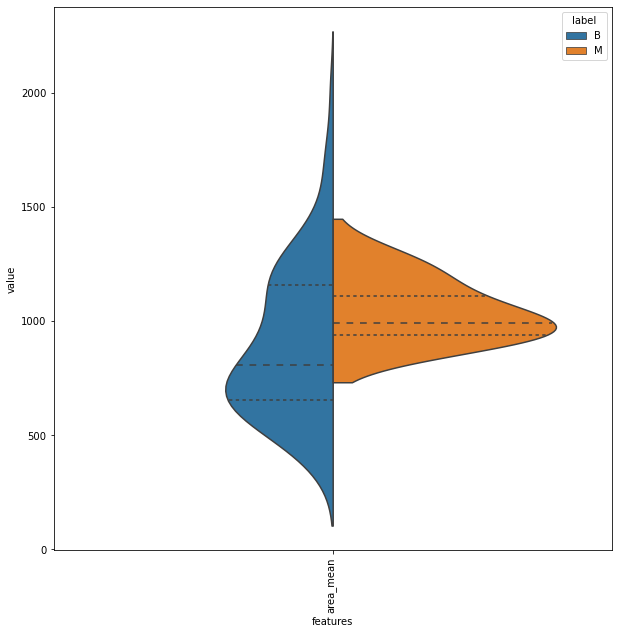

In [140]:
data_dia = pd.DataFrame({'label':labels_prog})
data = df_prog.iloc[all_ind]
# data_n_2 = (data - data.mean()) / (data.std())              # standardization
data_n_2 = data
data = pd.concat([data_dia,data_n_2.iloc[:,3]],axis=1)
data = pd.melt(data,id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sn.violinplot(x="features", y="value", hue="label", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [12]:
# build MLP
# Can we build a model that is more determined by more significant features?
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

In [13]:
class MyANN(nn.Module):
    def __init__(self):
        super().__init__()
        super(MyANN, self).__init__()
        self.fc1 = nn.Linear(20,500)
        self.fc2 = nn.Linear(500,1000)
        self.fc3 = nn.Linear(1000,100)
        self.fc4 = nn.Linear(100,2)
        self.dropout = nn.Dropout(0.15)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        x = self.dropout(x)
        x = F.softmax(self.fc4(x),dim=1)
        return x

In [14]:
y_train_n = y_train[:]
y_train_n[y_train_n=='M'] = 1.0
y_train_n[y_train_n=='B'] = 0.0
y_train_n = np.asarray(y_train_n,dtype=float)
y_test_n = y_test[:]
y_test_n[y_test_n=='M'] = 1.0
y_test_n[y_test_n=='B'] = 0.0
y_test_n = np.asarray(y_test_n,dtype=float)

In [18]:
myANN = MyANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(myANN.parameters(), lr=0.0001, betas=(0.9, 0.95),weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=300, gamma=0.9)

losses_val=[]
losses_test = []
accs_val = []
accs_test = []
epochs = []

test_inp_tensor = torch.tensor(x_test.values).float()
test_label_tensor =  torch.tensor(y_test_n).long()


for e in range(1000):
    optimizer.zero_grad()
    inputs = torch.tensor(x_train.values).float() 
    labels = torch.tensor(y_train_n).long()
    y_hat=myANN.forward(inputs)
    loss=criterion(y_hat,labels)
    loss.backward()
    optimizer.step()
    if e%50==0:
        losses_val.append(loss.item())
        print('loss at epoch {} is {}'.format(e,loss.item()))
        epochs.append(e)
        losses_test.append(criterion(myANN.forward(test_inp_tensor),test_label_tensor).item())
        output_label_test =  myANN.forward(test_inp_tensor).max(axis=1)[1]
        acc_test = accuracy_score(y_test_n,output_label_test)
        accs_test.append(acc_test)
        output_label_val =  myANN.forward(inputs).max(axis=1)[1]
        acc_val = accuracy_score(y_train_n,output_label_val)
        accs_val.append(acc_val)
        
    scheduler.step()

loss at epoch 0 is 0.7032036185264587
loss at epoch 50 is 0.6731321811676025
loss at epoch 100 is 0.6618049144744873
loss at epoch 150 is 0.6186104416847229
loss at epoch 200 is 0.5656895637512207
loss at epoch 250 is 0.5166348814964294
loss at epoch 300 is 0.4666453003883362
loss at epoch 350 is 0.436740517616272
loss at epoch 400 is 0.4267667233943939
loss at epoch 450 is 0.4212593138217926
loss at epoch 500 is 0.42784324288368225
loss at epoch 550 is 0.4170936942100525
loss at epoch 600 is 0.4120464324951172
loss at epoch 650 is 0.4055781960487366
loss at epoch 700 is 0.39961162209510803
loss at epoch 750 is 0.40703651309013367
loss at epoch 800 is 0.40451276302337646
loss at epoch 850 is 0.39685434103012085
loss at epoch 900 is 0.39578619599342346
loss at epoch 950 is 0.4000946879386902


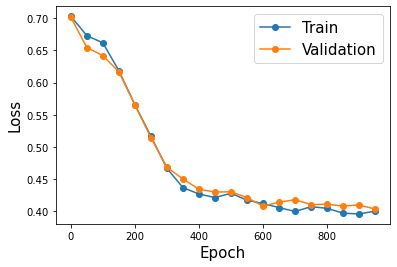

In [24]:
plt.plot(epochs,losses_val,'-o',label='Train')
plt.plot(epochs,losses_test,'-o',label='Validation')
plt.legend(fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.savefig('Loss.png',dpi=300)

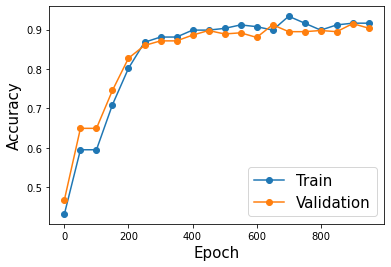

In [25]:
plt.plot(epochs,accs_val,'-o',label='Train')
plt.plot(epochs,accs_test,'-o',label='Validation')
plt.legend(fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.savefig('Accuracy.png',dpi=300)

Accuracy is:  0.9064327485380117


<AxesSubplot:>

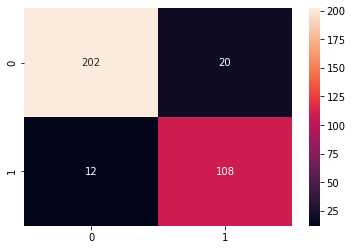

In [23]:
output_label = myANN.forward(torch.tensor(x_test.values).float()).max(axis=1)[1]
ac = accuracy_score(y_test_n,output_label)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test_n,output_label)
sn.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.2565789473684211


<AxesSubplot:>

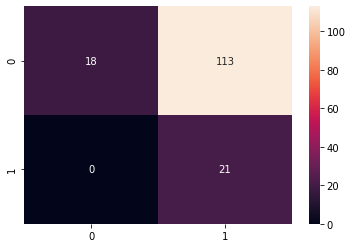

In [193]:
# test on prog data
labels_prog_n = labels_prog[:]
labels_prog_n[labels_prog_n=='M'] = 0.0
labels_prog_n[labels_prog_n=='B'] = 1.0
labels_prog_n = np.asarray(labels_prog_n,dtype=float)

output_label = myANN.forward(torch.tensor(df_prog_1.iloc[all_ind].values).float()).max(axis=1)[1]
ac = accuracy_score(labels_prog_n,output_label)
print('Accuracy is: ',ac)
cm = confusion_matrix(labels_prog_n,output_label)
sn.heatmap(cm,annot=True,fmt="d")

In [173]:
output_label

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])

In [145]:
labels_prog_n

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.])